In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [11]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 UT              10
 IN              10
 MO               9
 AZ               9
 AL               8
 DE               6
 MI               6
 GA               6
 KY               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 NM               3
 KS               3
 MN               2
 ID               2
 SC               1
 RI               1
 Los Angeles      1
Name: job_state, dtype: int64

In [12]:
# Fixed state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
KY      6
MI      6
GA      6
DE      6
IA      5
CT      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
# Job Description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [14]:
# Competitor Count
df['num_comp'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x!='-1' else 0)

In [15]:
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [16]:
df['min_salary'].fillna(value = df['min_salary'].mean(),inplace=True)
df['max_salary'].fillna(value = df['max_salary'].mean(),inplace=True)
df['avg_salary'].fillna(value = df['avg_salary'].mean(),inplace=True)

In [17]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
rstudio_yn           0
spark_yn             0
aws_yn               0
excel_yn             0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [18]:
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [19]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.113682,128.444130,100.172414,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.082634,45.184558,37.822619,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.250000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,70.500000,124.000000,98.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,90.000000,154.750000,121.000000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

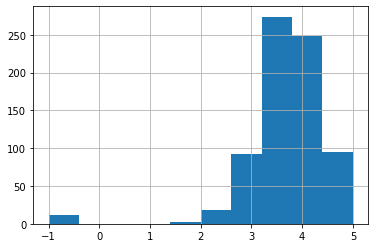

In [22]:
df.Rating.hist()

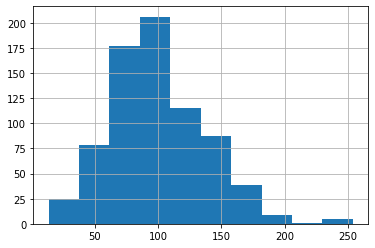

In [23]:
df.avg_salary.hist()

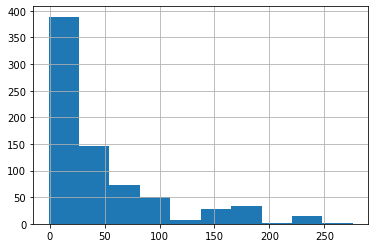

In [24]:
df.age.hist()

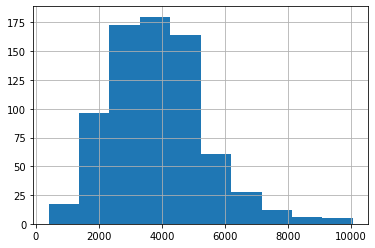

In [25]:
df.desc_len.hist()

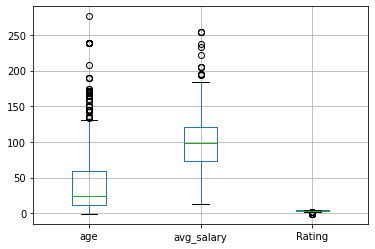

In [26]:
df.boxplot(column = ['age','avg_salary','Rating'])

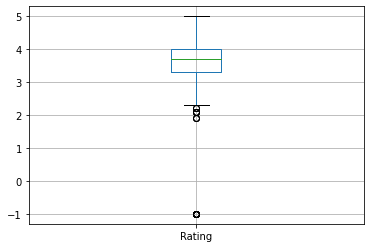

In [27]:
df.boxplot(column ='Rating')

In [28]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.036472,0.021655,0.163911
avg_salary,0.036472,1.000000,0.079506,0.090502
Rating,0.021655,0.079506,1.000000,-0.012281
desc_len,0.163911,0.090502,-0.012281,1.000000


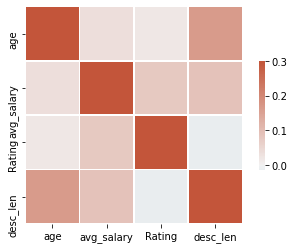

In [29]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 'same_state',
            'python_yn','rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

Graph for Location total=200


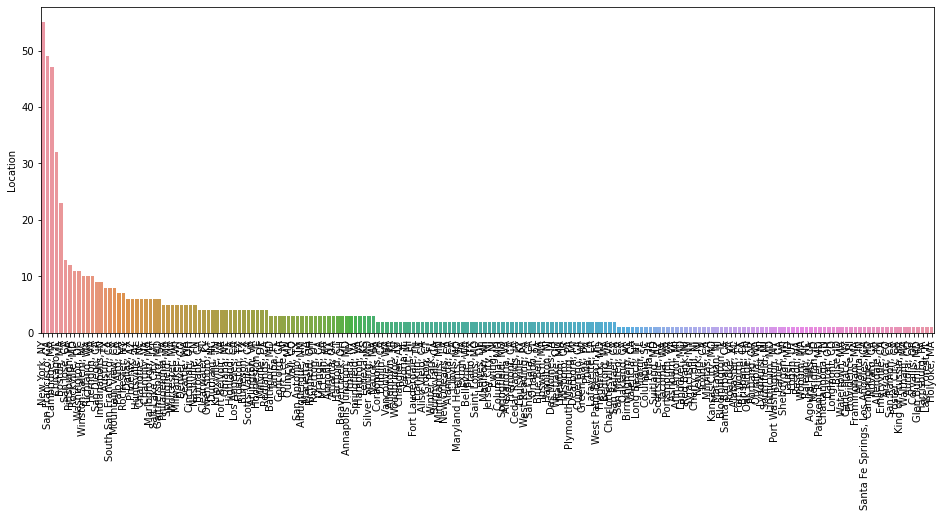

Graph for Headquarters total=198


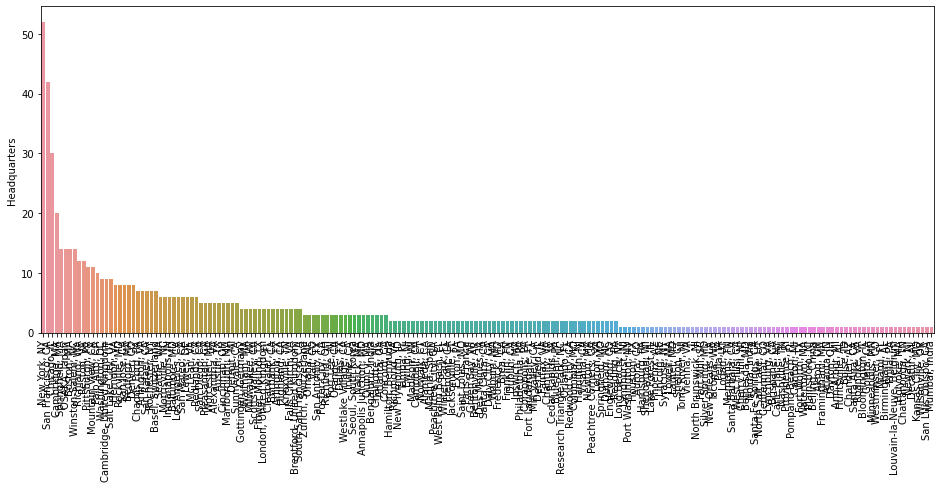

Graph for Size total=9


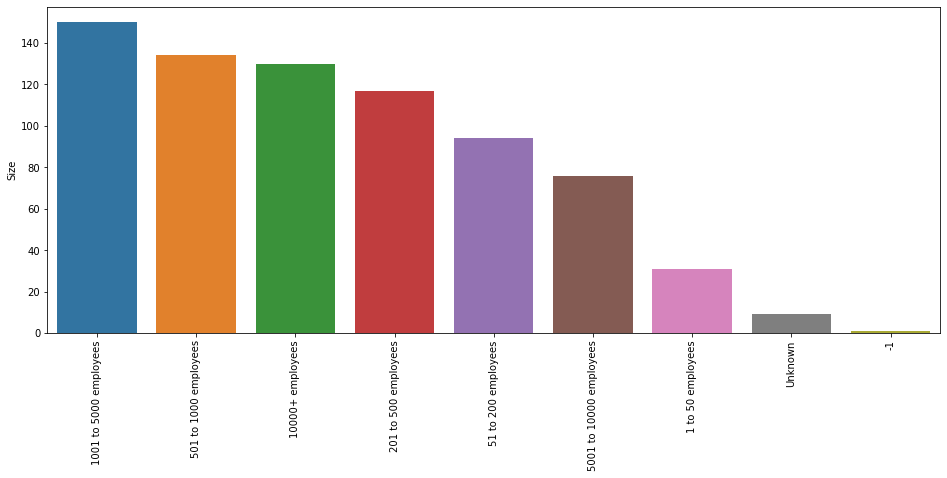

Graph for Type of ownership total=11


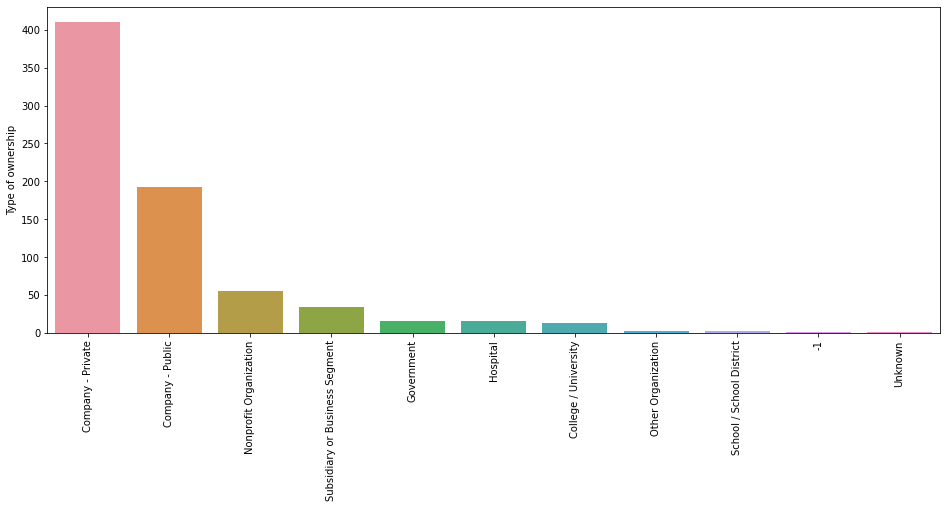

Graph for Industry total=60


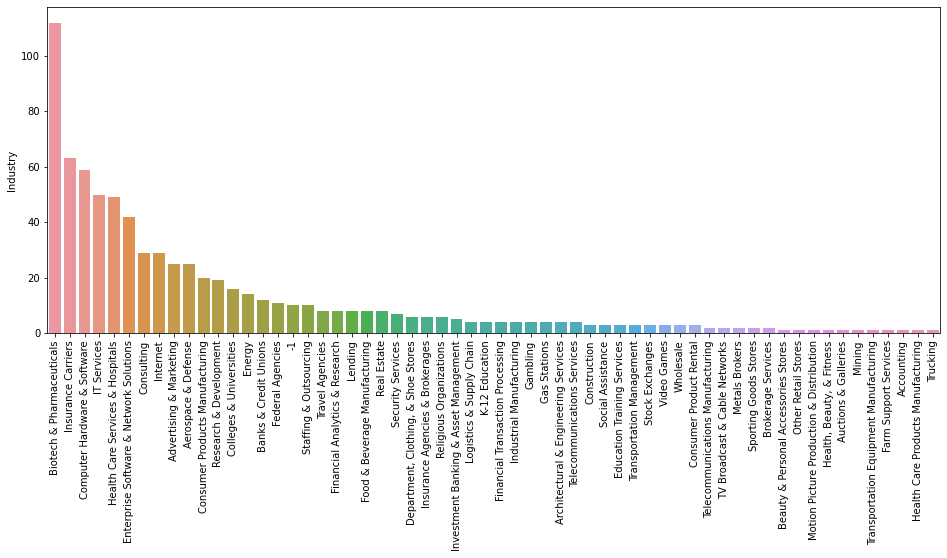

Graph for Sector total=25


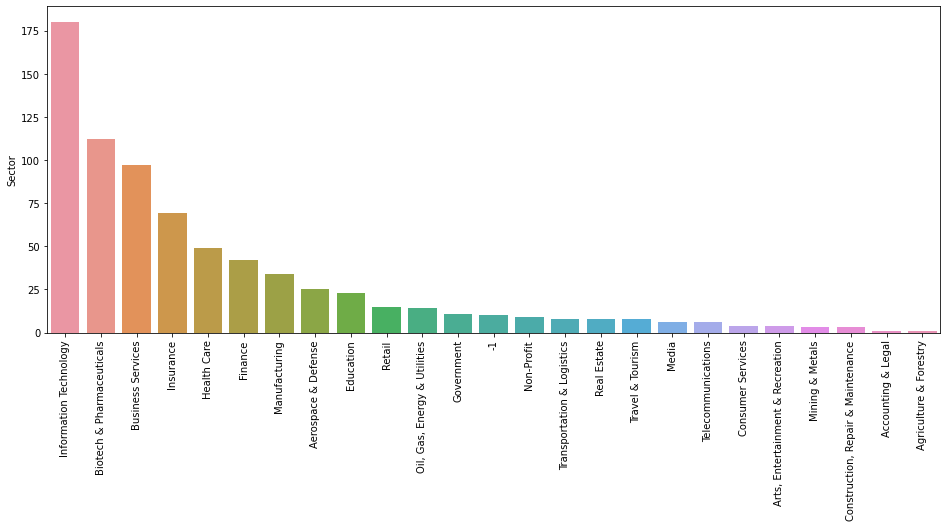

Graph for Revenue total=14


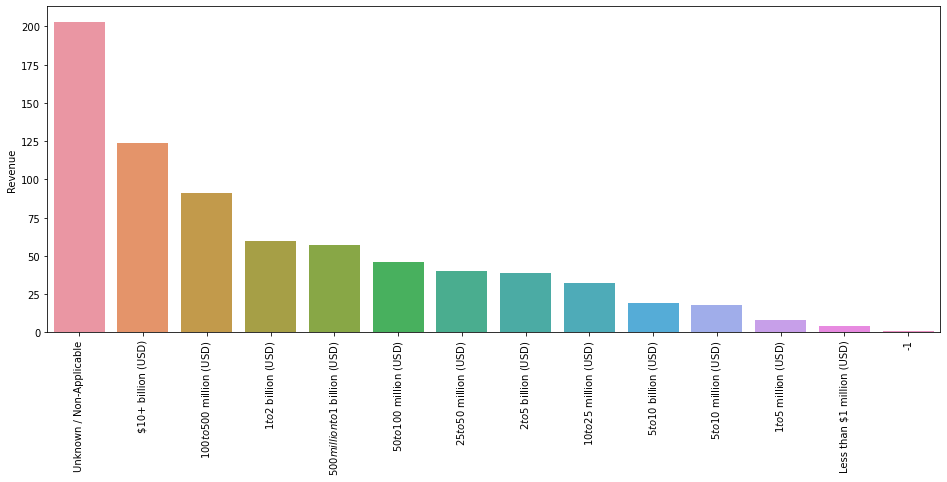

Graph for company_txt total=343


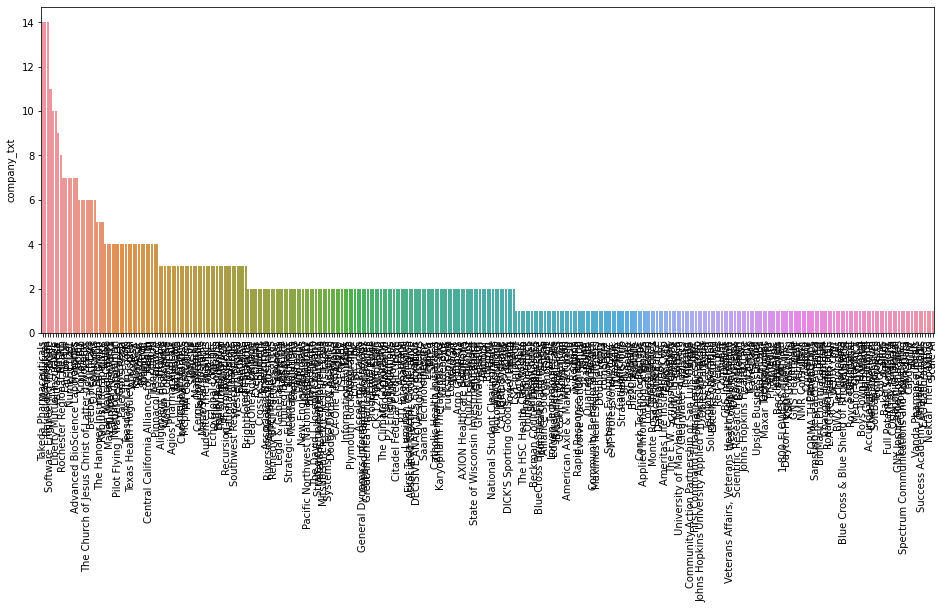

Graph for job_state total=37


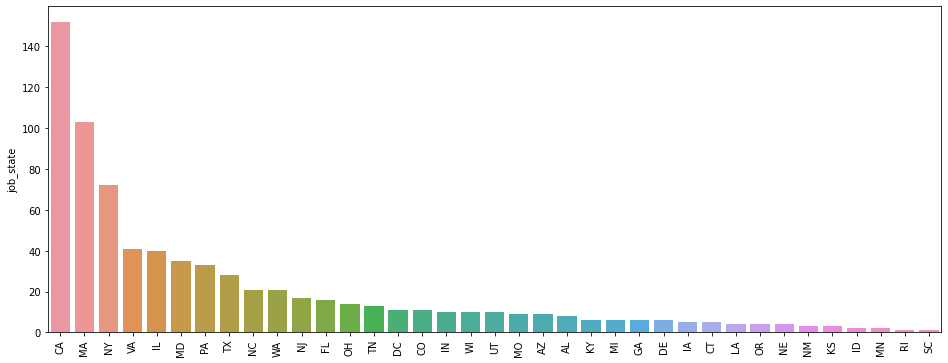

Graph for same_state total=2


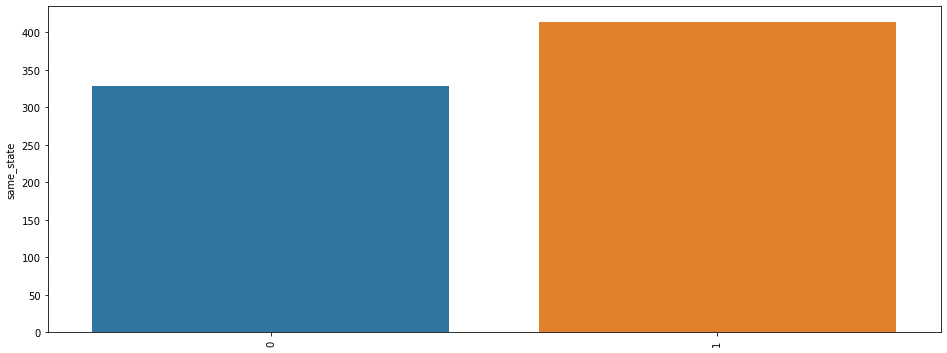

Graph for python_yn total=2


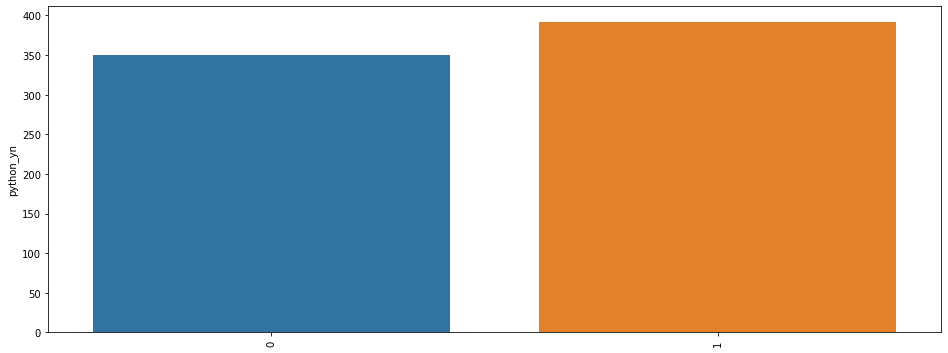

Graph for rstudio_yn total=2


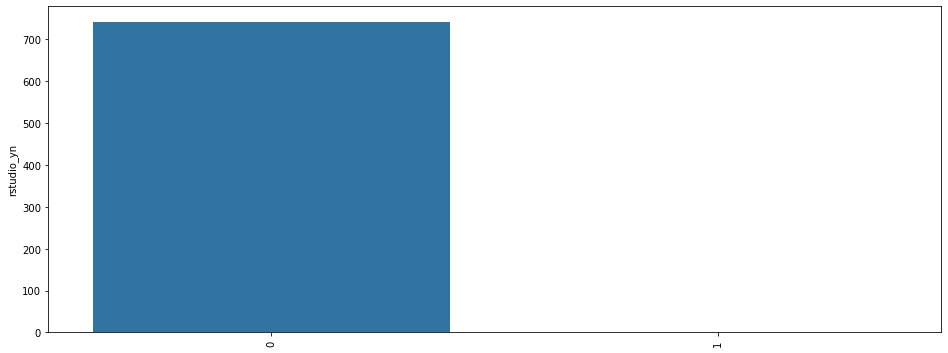

Graph for spark_yn total=2


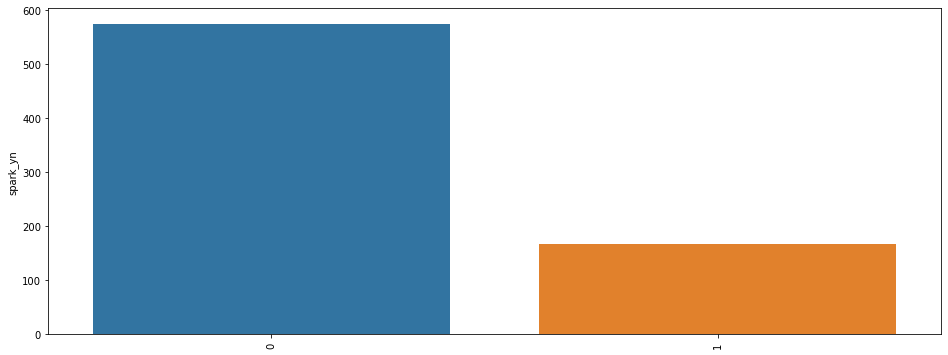

Graph for aws_yn total=2


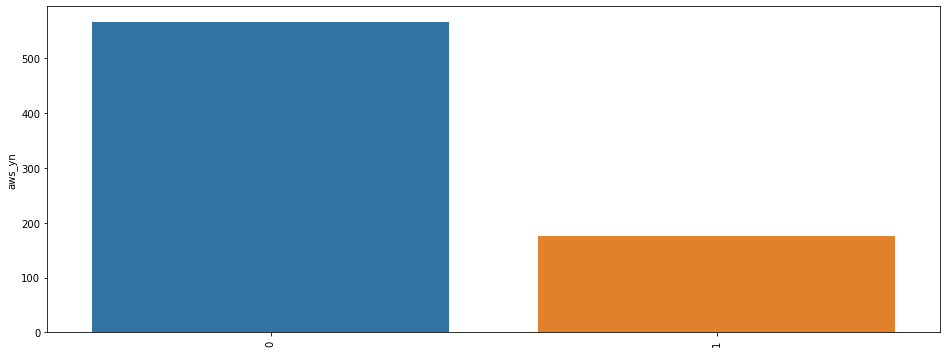

Graph for excel_yn total=2


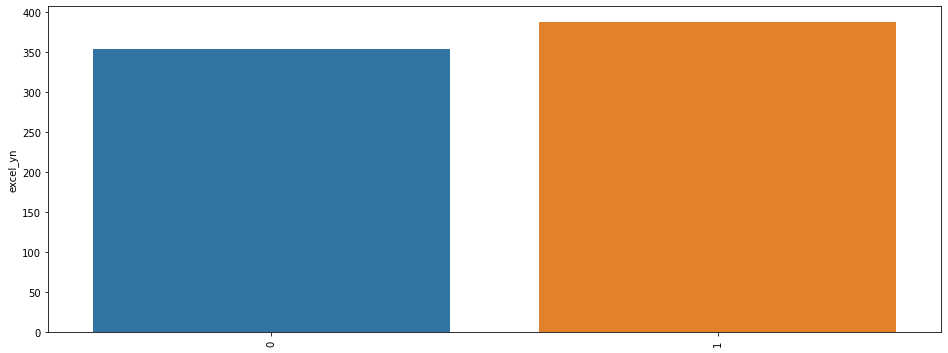

Graph for job_simp total=7


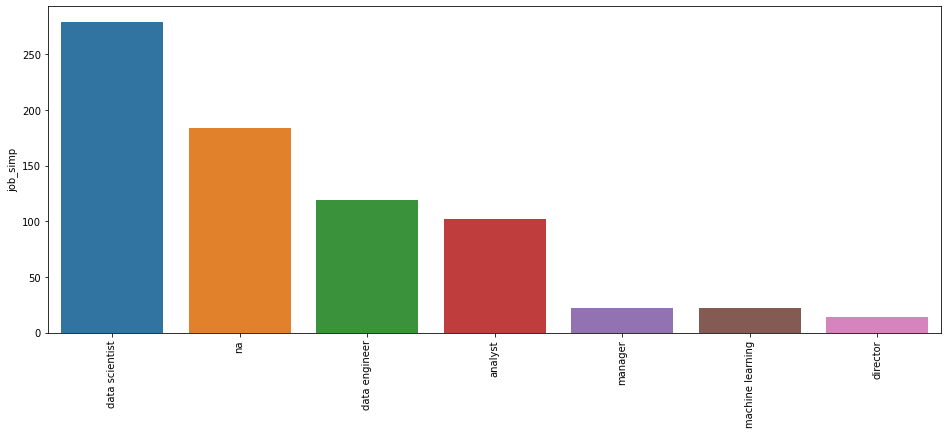

Graph for seniority total=3


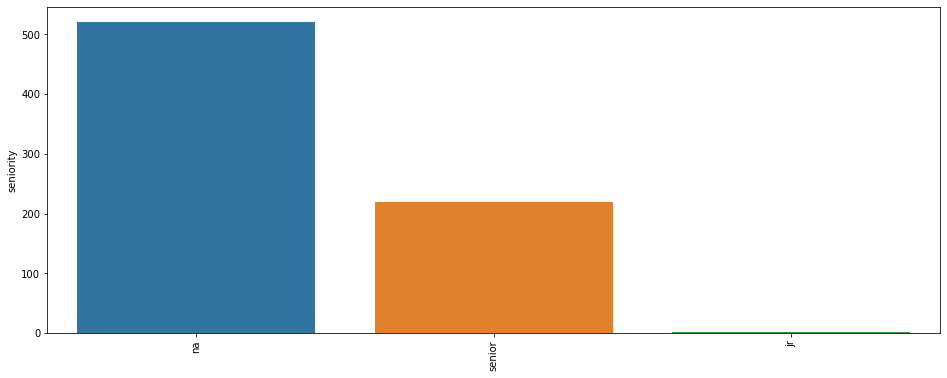

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s total=%d'%(i,len(cat_num)))
    plt.figure(figsize=(16, 6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90) #Rotating xlabel.
    plt.show()

Graph for Location: total=20


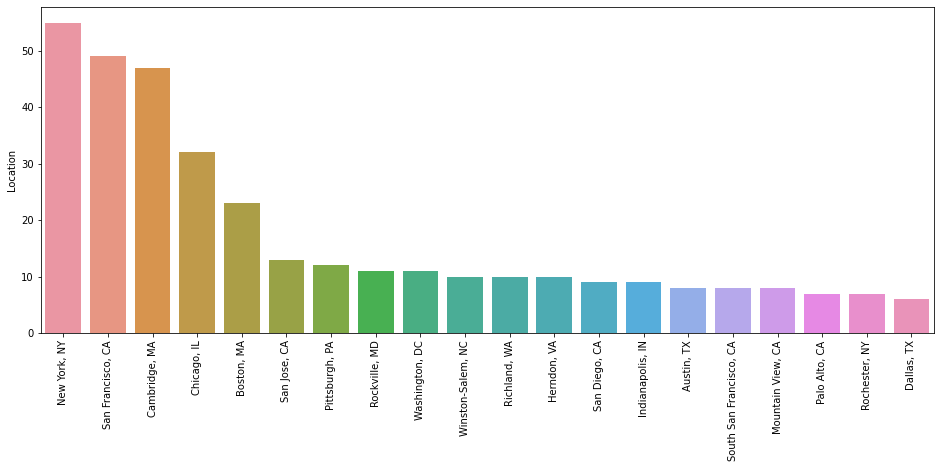

Graph for Headquarters: total=20


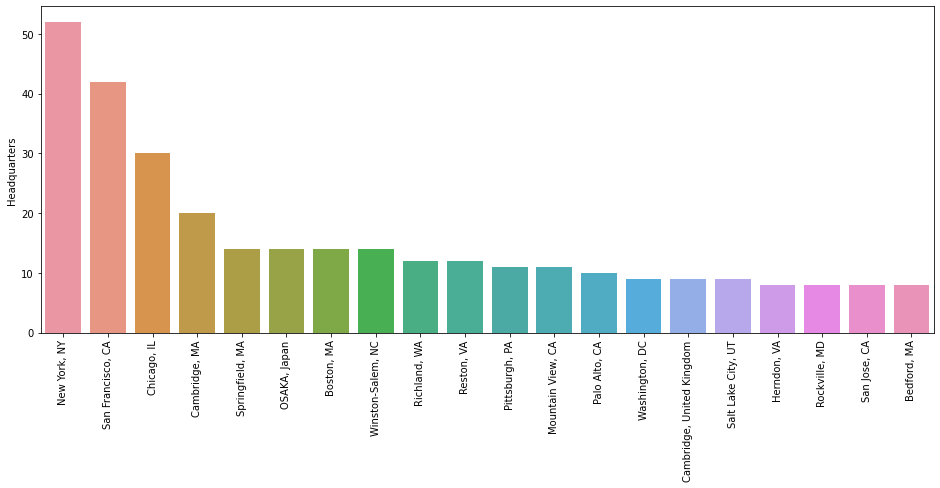

Graph for company_txt: total=20


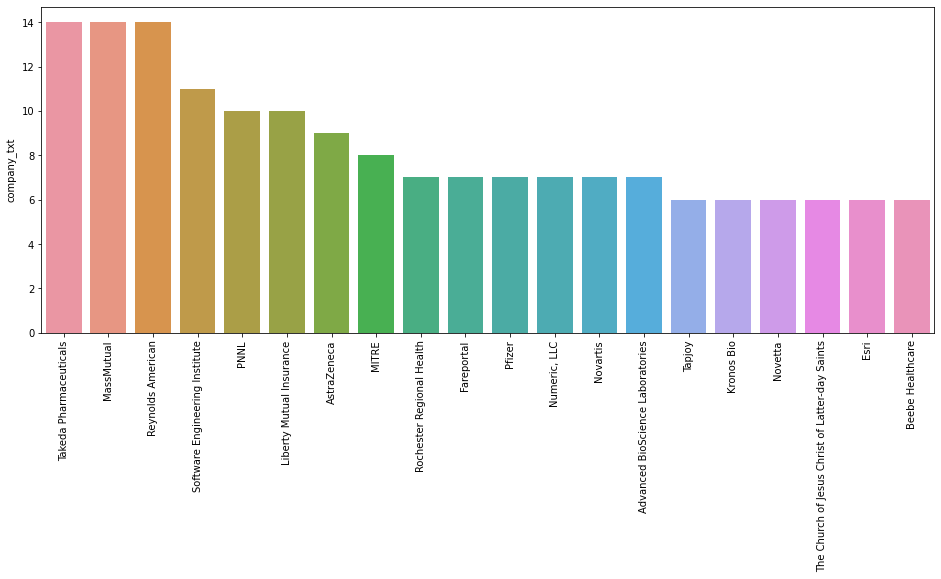

In [32]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total=%d" %(i,len(cat_num)))
    plt.figure(figsize=(16, 6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90) #Rotating xlabel.
    plt.show()

In [33]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.131701
data scientist,116.169757
director,168.607143
machine learning,126.431818
manager,84.022727
na,85.314655


In [34]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp         seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          96.306981
                 senior     124.689189
data scientist   jr         106.500000
                 na         106.453467
                 senior     135.918666
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          75.123676
                 senior     108.020871

In [35]:
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
CA,121.954061
IL,116.662500
MA,106.982759
NJ,104.558824
DC,100.213166
RI,100.000000
NY,98.652778
NC,98.452381
MD,97.357143


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [37]:
df_pivots = df[['Rating','Industry', 'Sector','Revenue','num_comp','hourly', 'employer_provided','python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn','desc_len', 'Type of ownership','avg_salary']]

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values= 'avg_salary').sort_values('avg_salary' , ascending= False))

Rating
        avg_salary
Rating            
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.3    107.526083
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
-1.0    101.111285
 4.2    100.442308
 5.0    100.337931
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

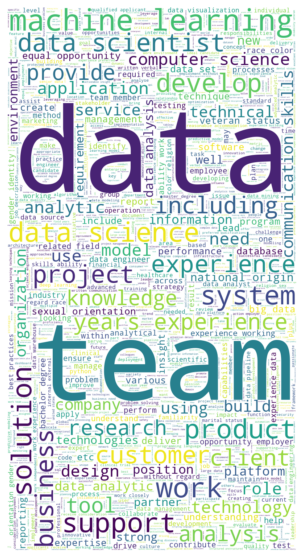

In [40]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
df.to_csv('eda_data.csv',index=False)